In [1]:
import sys
sys.path.append("../../")
from simulation_classes.drones import Drones
from simulation_classes.simulation_setting import SimulationSettings
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [50]:
TOTAL_TIME = 100
time_step = 0.1
simulation_steps = int(TOTAL_TIME / time_step)
scale_factor = 30
legal_speed = 1.5
real_legal_speed = max(2, legal_speed) * scale_factor * 3.6
TOTAL_DISTANCE = 50
boundary_condition = "FIXED"
UPDATE_RULE = "parallel"


print(f"この設定だと法定速度は時速{real_legal_speed}km")
print(f"巡航距離は{TOTAL_DISTANCE * scale_factor /1000}kmです")

この設定だと法定速度は時速216.0km
巡航距離は1.5kmです


In [51]:
DRONE_NUM = 10
v_0 = 0
a = 1
c = 2
max_acc = 0.2 
min_acc = 0.15 if boundary_condition =="FIXED" else -1
x_end = TOTAL_DISTANCE if boundary_condition =="FIXED" else 1e6

drone_list_1 = [Drones(xcor=i * (-1),
                     ycor=0, 
                     v_0=0,
                     a=a,
                     c=c,
                     legal_speed=legal_speed, 
                     scale_factor=scale_factor,
                     drone_idx = i,
                     min_acc=min_acc,
                     x_end = x_end )
               for i in range(DRONE_NUM)]

drone_list_2 = [Drones(xcor=i * (-1),
                     ycor=0, 
                     v_0=0,
                     a=a,
                     c=c,
                     legal_speed=legal_speed, 
                     scale_factor=scale_factor,
                     drone_idx = i,
                     min_acc=min_acc,
                     x_end = x_end )
               for i in range(DRONE_NUM)]
print("最大加速度は{:.2f}G".format(max_acc * scale_factor / 9.8))
print("最小加速度は{:.2f}G".format(min_acc * scale_factor / 9.8))
print("減速区間の長さは{:.2f}m".format((legal_speed**2 / min_acc) * scale_factor))
if (TOTAL_DISTANCE is not None):
    print("全区間の長さは{:.2f}km".format(TOTAL_DISTANCE* scale_factor/1000))



最大加速度は0.61G
最小加速度は0.46G
減速区間の長さは450.00m
全区間の長さは1.50km


In [52]:
simulation = SimulationSettings(
    TOTAL_TIME=TOTAL_TIME, 
    time_step=time_step, 
    scale_factor=scale_factor,
    drone_list=drone_list_1,
    boundary_condition=boundary_condition,
    TOTAL_DISTANCE=TOTAL_DISTANCE,
    UPDATE_RULE="parallel" )

simulation_2 = SimulationSettings(
    TOTAL_TIME=TOTAL_TIME, 
    time_step=time_step, 
    scale_factor=scale_factor,
    drone_list=drone_list_2,
    boundary_condition=boundary_condition,
    TOTAL_DISTANCE=TOTAL_DISTANCE,
    UPDATE_RULE="sequential" )

In [53]:
simulation.run()
simulation_2.run()

===PARALLEL実行===
===Sequential実行===


In [54]:
drones = simulation.drone_list
drone_0_1 = drone_list_1[0]
drone_1_1 = drone_list_1[1]
drone_1_5 = drone_list_1[4]

drone_0_2 = drone_list_2[0]
drone_1_2 = drone_list_2[1]
drone_2_5 = drone_list_2[4]

a = np.array(drone_1_1.xcorList) 
b = np.array(drone_1_2.xcorList) 
print(len(a), len(b))
print(np.where(a == 1e6)[0][0])
print(np.where(b == 1e6)[0][0])
# print(a[450:550])
# print(b[450:550])


1001 1001
528
529


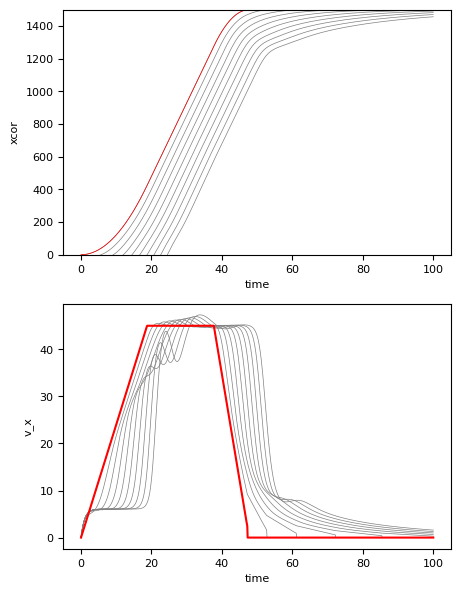

In [55]:
simulation.graph_show_scaled()

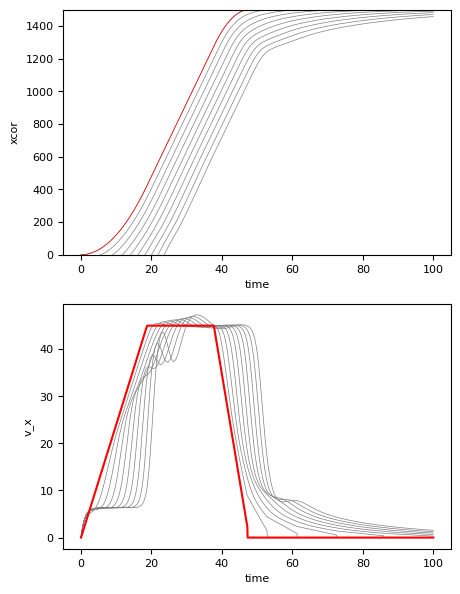

In [56]:
simulation_2.graph_show_scaled()